# Exploratory Data Analysis (EDA)

### Importing packages and uploading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statistics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv(r'data/2023_playlist.csv')

In [4]:
df.describe()

,duration,popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,259464.023483,30.692759,4.479452,0.604996,0.589481,5.379648,-10.099926,0.46184,0.096821,0.323421,0.400003,0.170899,0.502759,117.914372
std,111271.796025,18.846062,3.943109,0.174393,0.218296,3.558571,4.178727,0.49903,0.102004,0.319328,0.385495,0.142286,0.264037,30.110249
min,60173.000000,0.000000,1.000000,0.000000,0.011100,0.000000,-29.402000,0.00000,0.000000,0.000019,0.000000,0.022200,0.000000,0.000000
25%,184937.000000,16.000000,1.000000,0.497000,0.467000,2.000000,-11.792000,0.00000,0.039600,0.043650,0.001525,0.091050,0.288000,93.948000
50%,243933.000000,31.000000,3.000000,0.624000,0.613000,5.000000,-9.290000,0.00000,0.053700,0.197000,0.304000,0.116000,0.516000,119.795000
75%,311086.500000,44.000000,7.000000,0.738500,0.740000,9.000000,-7.254000,1.00000,0.103000,0.561500,0.836500,0.190500,0.717000,135.583500
max,909040.000000,87.000000,22.000000,0.953000,0.994000,11.000000,-0.416000,1.00000,0.729000,0.996000,0.987000,0.877000,0.984000,218.036000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        511 non-null    object 
 1   artist            511 non-null    object 
 2   album             511 non-null    object 
 3   release_date      511 non-null    object 
 4   duration          511 non-null    int64  
 5   popularity        511 non-null    int64  
 6   explicit          511 non-null    bool   
 7   track_number      511 non-null    int64  
 8   danceability      511 non-null    float64
 9   energy            511 non-null    float64
 10  key               511 non-null    int64  
 11  loudness          511 non-null    float64
 12  mode              511 non-null    int64  
 13  speechiness       511 non-null    float64
 14  acousticness      511 non-null    float64
 15  instrumentalness  511 non-null    float64
 16  liveness          511 non-null    float64
 1

In [6]:
df

,track_name,artist,album,release_date,duration,popularity,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,船窓,Emerson Kitamura,船窓 / おろかな指,2022-08-03,210800,22,False,1,0.688,0.297,3,-15.369,1,0.0636,0.5050,0.921000,0.1130,0.0391,124.007,spotify:track:75q97me0dAUd7GDbilPCiu
1,I Found What I've Been Searching For,La'Verne Washington,The Promise / I Found What I've Been Searching...,2020-08-21,259540,29,False,2,0.530,0.694,1,-4.774,1,0.0374,0.2820,0.000000,0.2790,0.4740,149.533,spotify:track:1OvyyA8AHjfAdDmnM6KOlY
2,"Good Thoughts, Bad Thoughts",Funkadelic,Standing On The Verge Of Getting It On,1974-07-10,737130,41,False,7,0.398,0.306,4,-17.293,0,0.0363,0.9340,0.012100,0.2150,0.2930,108.145,spotify:track:2jIMUFk9VGIOUYTWyx2pC5
3,Such a Feeling,Aurra,Live and Let Live,1983-01-01,321533,0,False,1,0.767,0.784,0,-6.800,1,0.0592,0.1530,0.000017,0.0557,0.7080,108.005,spotify:track:6avNBU8cdaICX5wDd2cINn
4,High John,MAVI,"Laughing so Hard, it Hurts",2022-10-14,130156,57,True,1,0.545,0.540,11,-10.010,1,0.4800,0.7180,0.000000,0.2070,0.6570,170.387,spotify:track:55liByWjb2T7j0vohSel10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,Future Perfect,The Durutti Column,Fidelity,1996,315000,45,False,3,0.729,0.438,1,-18.854,1,0.0535,0.0996,0.393000,0.0919,0.5190,99.976,spotify:track:0RlpgTdnxatoTRBvG34zaB
507,Dance Yourself Free,Rebecca Vasmant,Broken Biscuits,2022-02-17,372524,1,False,2,0.496,0.948,7,-4.493,1,0.2490,0.0531,0.006520,0.0683,0.7370,115.982,spotify:track:0LEcwSGEPRTKFwABHpOHA1
508,I Am Stretched on Your Grave,Sinéad O'Connor,I Do Not Want What I Haven't Got,1990-07-01,333386,39,False,2,0.712,0.654,8,-8.039,0,0.0667,0.0936,0.067200,0.1310,0.5480,93.957,spotify:track:2VQUtkqHTXKY5rm81PZEtk
509,Rotations,Ebende,Åter,2023-11-03,452411,4,False,2,0.807,0.839,11,-11.025,0,0.0640,0.0211,0.861000,0.0884,0.8370,128.008,spotify:track:1y0fZhqZeB5EYEg3lhZnLT


## Initial EDA - Playlist Stats

### Duration

In [9]:
duration_hours = round(df['duration'].sum()/3600000, 1)
duration_days = round(df['duration'].sum()/86400000, 2)
no_of_tracks = df['track_name'].count()

duration_string = f'The playlist has {no_of_tracks} tracks. It is a total of {duration_hours} hours and {duration_days} days long'
print(duration_string)

The playlist has 511 tracks. It is a total of 36.8 hours and 1.53 days long


### Top Artists

In [10]:
artist_counts = df['artist'].value_counts()

# Get the artist with the largest number of occurrences
most_common_artist = artist_counts.idxmax()

In [12]:
artist_counts = df['artist'].value_counts().reset_index().rename(columns={'index': 'artist', 'artist': 'artist occurences'})
artist_counts.head(10)

,artist,artist occurences
0,Ray Barretto,12
1,Emahoy Tsege Mariam Gebru,9
2,Don Pascal,8
3,Gilla Band,8
4,Kamaal Williams,7
5,Yves Tumor,6
6,Tara Clerkin Trio,6
7,Alogte Oho & His Sounds of Joy,5
8,Yusef Lateef,5
9,B. Cool-Aid,5


### Popularity

In [13]:
popularity_counts = df.groupby(df['popularity']).size().reset_index(name='count')
# popularity_counts

In [14]:
popularity_viz = px.bar(popularity_counts, x='popularity', y='count')
popularity_viz.show()

In [15]:
sorted_popularity = df.sort_values(by='popularity', ascending=False)

highest_popularity_track = sorted_popularity.iloc[0:3][['artist', 'track_name', 'release_date']]
highest_popularity_track

,artist,track_name,release_date
300,Travis Scott,I KNOW ?,2023-07-28
356,Jungle,Back On 74,2023-08-11
299,Travis Scott,MY EYES,2023-07-28


- Songs with a popularity score of 0 were the mode by a long way! Shows how difficult it is for songs to score highly in the popularity score!
- The 3 outlier songs were represented by Travis Scott and Jungle!

## Audio Features EDA

In [16]:
audio_features = {
    'danceability': statistics.mean(df['danceability']),
    'energy': statistics.mean(df['energy']),
    'loudness': statistics.mean(df['loudness']),
    'speechiness': statistics.mean(df['speechiness']),
    'acousticness': statistics.mean(df['acousticness']),
    'instrumentalness': statistics.mean(df['instrumentalness']),
    'liveness': statistics.mean(df['liveness']),
    'valence': statistics.mean(df['valence']),
    'tempo': statistics.mean(df['tempo']),
}

audio_df = pd.DataFrame.from_dict(audio_features, orient='index', columns=['score'])

audio_df = audio_df.reset_index()

audio_df = audio_df.rename(columns={'index': 'audio feature'})

print(audio_df)

      audio feature       score
0      danceability    0.604996
1            energy    0.589481
2          loudness  -10.099926
3       speechiness    0.096821
4      acousticness    0.323421
5  instrumentalness    0.400003
6          liveness    0.170899
7           valence    0.502759
8             tempo  117.914372


In [25]:
radar_features = [0, 1, 3, 4, 5, 6, 7]
audio_radar = audio_df.loc[radar_features, :]

radar_fig = px.line_polar(audio_radar, r='score', theta=['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'], range_r=[0,1], title= "Audio Features", line_close=True)
radar_fig.update_traces(fill='toself')
radar_fig.show()

In [26]:
# tempo boxplot
tempo = df['tempo']
tempo_box = px.box(tempo, x="tempo", title="Tempo")
tempo_box.update_traces(orientation='h')
tempo_box.show()


In [27]:

group_labels = ['distplot'] # name of the dataset

fig_tempo = ff.create_distplot([tempo], group_labels)
fig_tempo.show()

TypeError: create_distplot() got an unexpected keyword argument 'title'

In [28]:
# loudness boxplot
loudness = df['loudness']
loudness_box = px.box(loudness, x="loudness", title='Loudness')
loudness_box.update_traces(orientation='h')
loudness_box.show()

In [21]:
group_labels = ['distplot'] # name of the dataset

fig_loudness = ff.create_distplot([loudness], group_labels)
fig_loudness.show()

#### Correlation Matrix

/var/folders/65/2ht76krj4kl36j1_kgx_rp2w0000gq/T/ipykernel_22643/1962337331.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Heatmap')

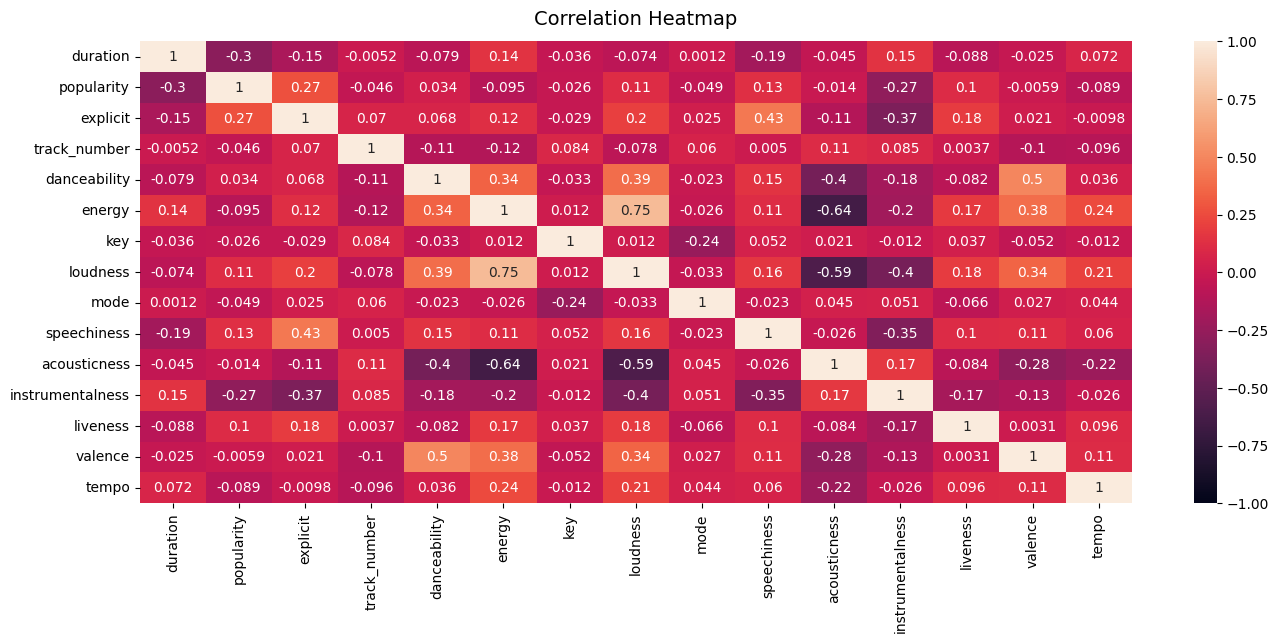

In [29]:
corr = df.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

- There are plenty of highly correlated variables, suggesting there is lot pf redundant info here and feature selection is important before the k-means clustering is performed